# Part I (75 points):  Apply Machine Learning approaches on MNIST Handwritten Digit Dataset

Task 6: (10 points) Applying clustering analysis on the feature data to discover the patterns among samples. 

In [1]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import time
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.manifold import TSNE
import pandas as pd
import sklearn

In [3]:
mnist = tf.keras.datasets.mnist
(X_train_val, y_train_val) ,(X_test, y_test) = mnist.load_data()  

Task 6.1: Get small dataset by sampling same number of images per class from the training data. To simplify the analysis, you can sample at most 50 images per class from the training data.

In [4]:
# Count the number of each category of training set, validation set and test set
X_small = []
y_small = []
y_train_classnum = [0,0,0,0,0,0,0,0,0,0]

for x,y in zip(X_train_val, y_train_val):
  if y_train_classnum[y]<50:
    y_train_classnum[y] +=1
    X_small.append(x)
    y_small.append(y)
X_small = np.array(X_small, np.float32)
y_small = np.array(y_small)

In [5]:
print(X_small.shape)

(500, 28, 28)


Task 6.2: Use PCA or t-SNE to reduce the small dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each images' target class (refer to steps in Week6-Lab I: Dimension_Reduction).

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.002s...
[t-SNE] Computed neighbors for 500 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 767.524006
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.686867
[t-SNE] KL divergence after 1000 iterations: 0.765381


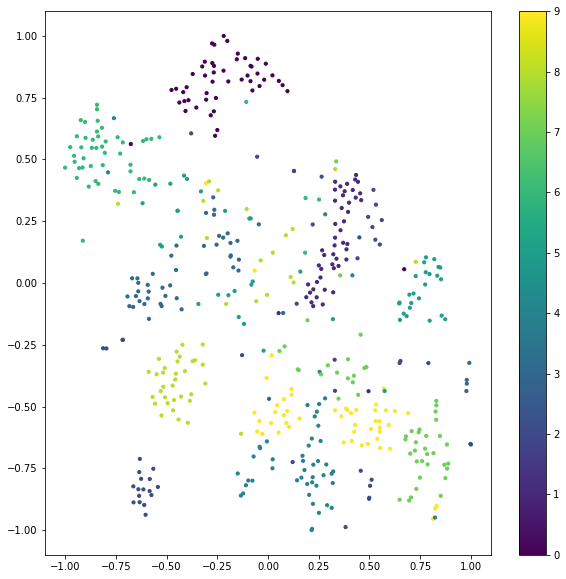

In [6]:
#PCA
x_small = X_small.reshape([-1,28*28])
# t-SNE
tsne = TSNE(n_components=2, verbose=1 ,random_state=42)
result = tsne.fit_transform(x_small)
## Normalized 
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
result = scaler.fit_transform(result)

plt.figure(figsize=(10, 10))
plt.scatter(result[:,0], result[:,1] , c=y_small, s=10)
plt.colorbar()
plt.show()

Task 6.3: Cluster the images using K-means, determine the optimal number of clusters using silhousette score. (Refer to steps in Textbook: P238-247)
Task 6.4: Given the optimal clusters from Task 6.3, visualize the images in every cluster: do you see similar faces in each cluster?


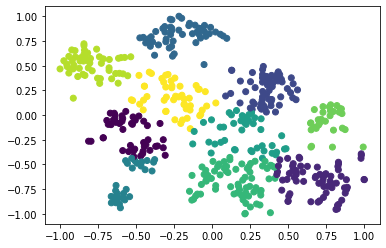

0.46568915


In [7]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=10, random_state=9).fit_predict(result)
plt.scatter(result[:,0],result[:,1],c=y_pred)
plt.show()
print(sklearn.metrics.silhouette_score(result, y_pred, metric='euclidean', sample_size=None, random_state=None))